The "Emotions" dataset is a collection of English Twitter messages meticulously annotated with six primary emotions: anger, fear, joy, love, sadness, and surprise. The goal of using this data is to gain insights into the emotional spectrum expressed in short-form text on social media, offering valuable resources for understanding and analyzing patterns of emotional expression in online communication

In [10]:
# Installing necessary dependencies

%pip install pandas seaborn matplotlib plotly wordcloud


In [52]:
# Necessary imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import graph_objs as go
from wordcloud import WordCloud
from collections import Counter
from typing import List

pd.options.mode.chained_assignment = None


**PART 1 - EDA**

In [12]:
emotions_df = pd.read_csv("text.csv")
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [13]:
# Dropping irrelevant column

emotions_df = emotions_df.drop(["Unnamed: 0"], axis=1)
emotions_df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


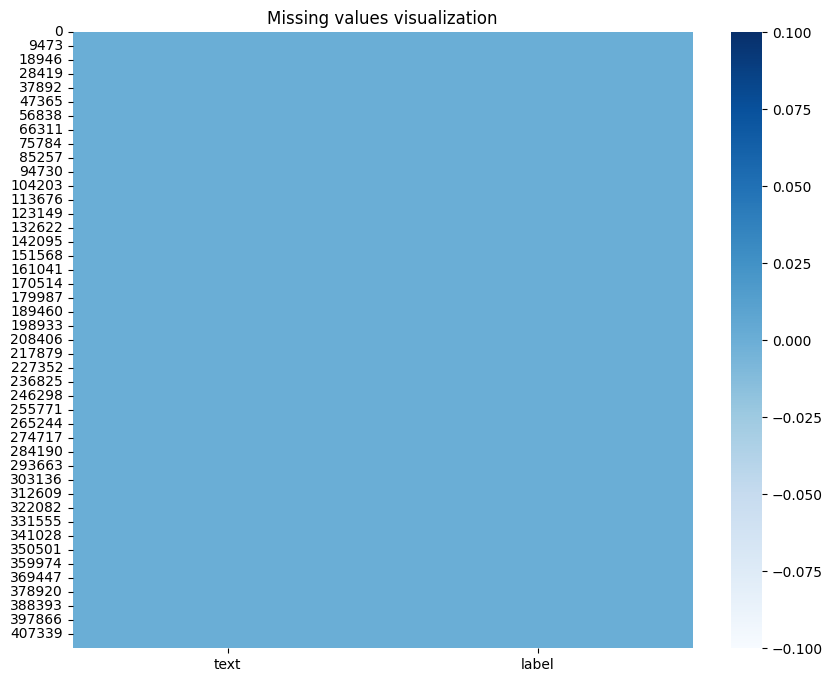

In [14]:
# Checking the presence of missing values

plt.figure(figsize=(10, 8))
sns.heatmap(emotions_df.isna(), cmap="Blues")
plt.title("Missing values visualization")
plt.show()

There are no missing values in this dataset

In [15]:
# Checking for duplicates, as duplicates can lead to inaccurate analysis, biased models, and inefficient resource use

emotions_df.duplicated().sum()

686

In [16]:
# Dropping duplicates

emotions_df = emotions_df.drop_duplicates()

**Visualizing the distribution of the target class**

For better readability, I will convert the encoded labels into their correspoding emotions - the emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

In [17]:
label_to_emotion = {
    0 : "sadness",
    1 : "joy",
    2 : "love",
    3 : "anger",
    4 : "fear",
    5 : "surprise"
}

In [19]:
emotions_df["label_decoded"] = emotions_df["label"].apply(lambda x: label_to_emotion.get(x))

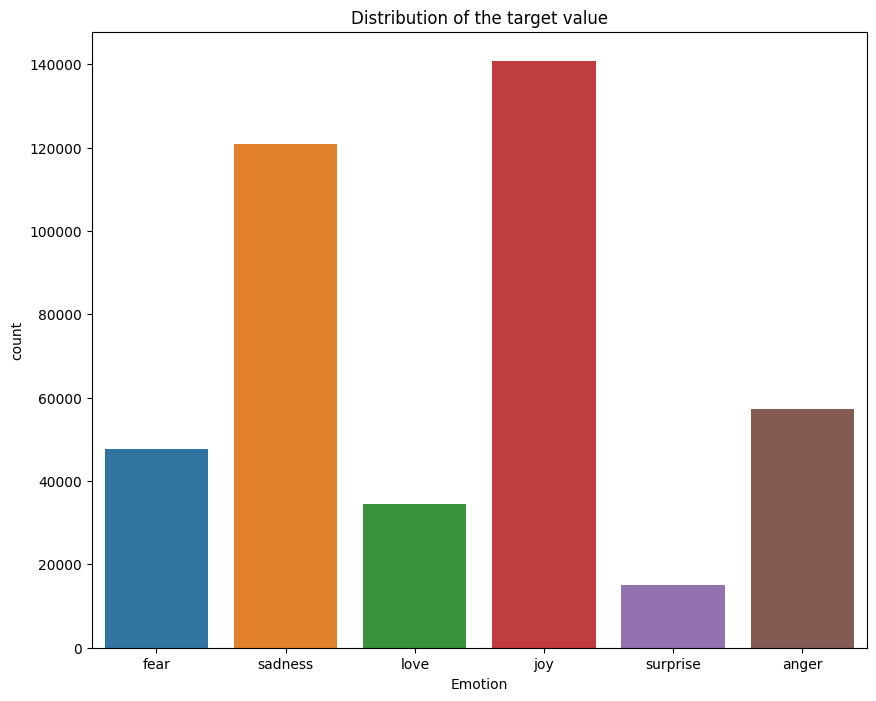

In [50]:
plt.figure(figsize=(10, 8))

sns.countplot(x=emotions_df["label_decoded"], hue=emotions_df["label_decoded"])
plt.title("Distribution of the target value")
plt.xlabel("Emotion")
plt.show()

It is clearly visible, that in this dataset we deal with class imbalance. Recognizing and addressing class imbalance is crucial for developing robust and fair machine learning models that accurately capture the underlying patterns in the data, as machine learning models trained on imbalanced data might become biased. 

In [21]:
# This dataset is created for the visualization purposes - it includes the name of each emotion and the corresponding frequency of occurrences of that emotion within the dataset

emotions_count_df = emotions_df.groupby("label_decoded")["text"].count().reset_index().sort_values(by="text", ascending=False)

In [22]:
fig = go.Figure(go.Funnelarea(
    text = emotions_count_df.label_decoded,
    values = emotions_count_df.text,
    title = {"position": "top center", "text": "Funnel-Chart of target distribution"}
    ))
fig.show()

In this dataset, joy is the most popular emotion, which is expected since people generally prefer to share positive news on social media platforms. Conversely, surprise ranks as the least popular emotion.

**Visualizing and analyzing the word frequencies**

Now, let's delve more into the text data itself. A word cloud is a data visualization technique that might be useful here, as it displays the most frequently occurring words in a text corpus. The purpose of a word cloud is to provide a visual representation of the prominent words within the text data, where the size of each word corresponds to its frequency of occurrence

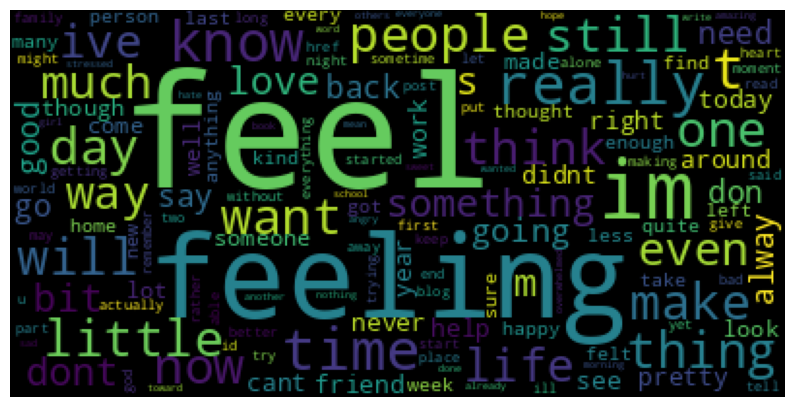

In [49]:
# Convert the text data to strings and concatenate them
text_data = ' '.join(emotions_df["text"].astype(str))

# Generate the WordCloud
wc = WordCloud(collocations=False).generate(text_data)

plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

It's evident that "feel" and "feeling" are the most common words in the text. These words are highly prominent, especially in discussions related to emotions

**Word clouds are visually striking but lack depth in conveying meaningful information beyond a few highlighted words. On the other hand, while bar plots may not be as visually appealing, they offer a more informative representation of data, making it easier to analyze and interpret. Now, let's take a look at some bar plots to dive deeper into the textual data**

In [53]:
def corpus(text: str) -> List[str]:
    text_list = text.split()
    return text_list

In [54]:
emotions_df['text_list'] = emotions_df['text'].apply(corpus)

In [55]:
corpus = []
for text_list in emotions_df['text_list']:
    corpus.extend(text_list)

In [56]:
most_common_words = Counter(corpus).most_common(15)
most_common_words

[('i', 675350),
 ('feel', 289391),
 ('and', 250153),
 ('to', 232955),
 ('the', 216507),
 ('a', 162780),
 ('feeling', 134036),
 ('that', 130663),
 ('of', 129922),
 ('my', 111136),
 ('in', 86381),
 ('it', 84414),
 ('like', 73881),
 ('so', 64923),
 ('for', 64019)]

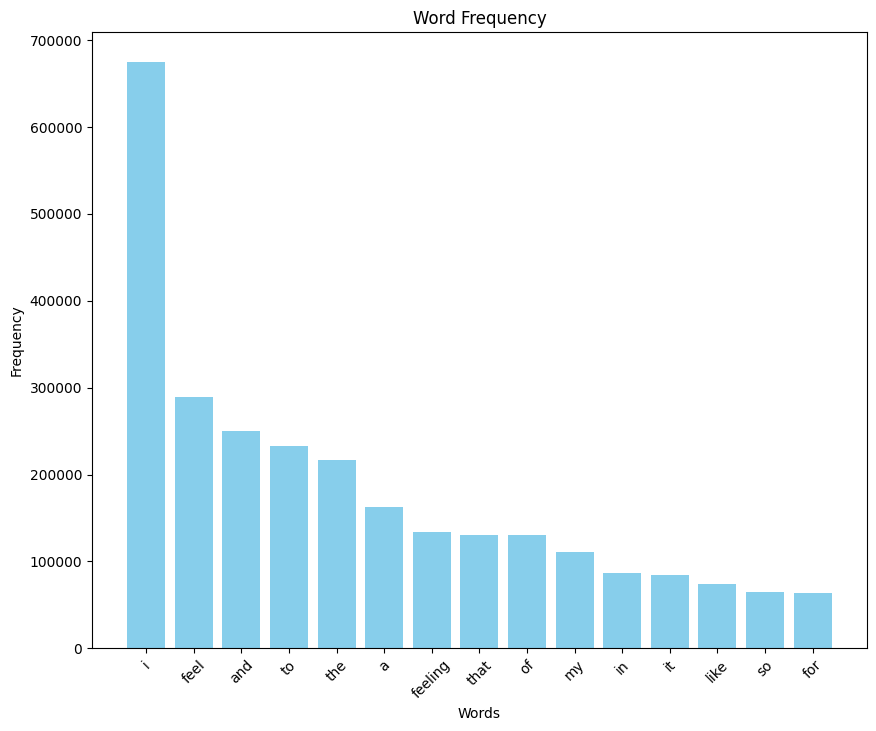

In [57]:
# Unzip the list of tuples into two lists
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 8))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.show()

This plot provides valuable insights into our data. Notably, words like "feel" and "feeling" hold significant prominence, consistent with our observations from the word cloud. However, beyond these, the plot mainly showcases common stopwords that don't contribute much to our analysis. The word "I" emerges as the most frequently used term, which is expected given its common usage in personal expressions. We'll address stopwords during the preprocessing step to refine our dataset for more meaningful analysis.

We could also analyze the word frequency for each emotion separately, but this can also be done after processing, as it will be more informative.

**Exploring the relationship between text length and emotion**

As part of our exploratory data analysis (EDA), we can investigate whether there's a relationship between the length of messages and the expressed emotion.

In [58]:
def message_length(words: List[str]) -> int:
  length = len(words)
  return length

In [59]:
emotions_df['text_length'] = emotions_df['text_list'].apply(message_length)

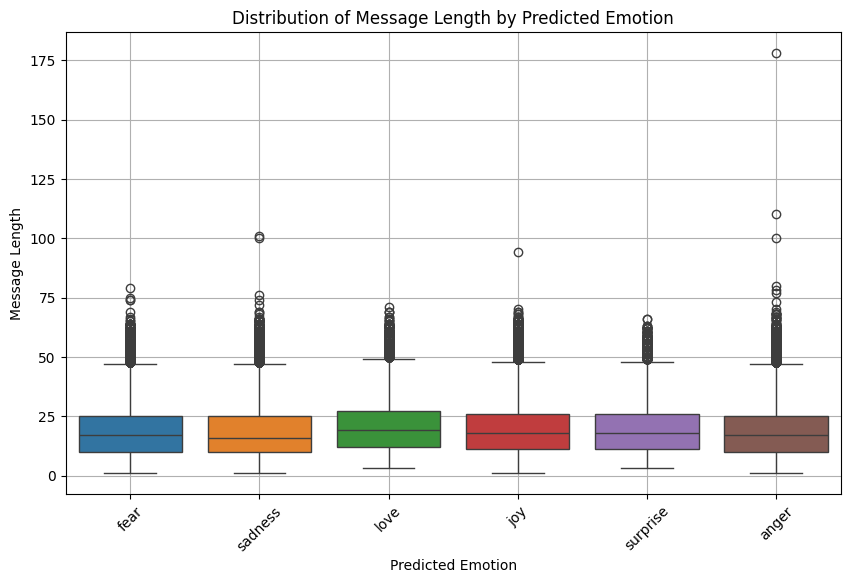

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label_decoded', y='text_length', hue='label_decoded', data=emotions_df)
plt.xlabel('Predicted Emotion')
plt.ylabel('Message Length')
plt.title('Distribution of Message Length by Predicted Emotion')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Looking at this boxplot, we can see that for each predicted emotion, the median text length is similar. It implies that the central tendency of text length remains consistent across different emotions. This observation suggests that text length might not be associated with the predicted emotion.
Among all the text messages analyzed, the longest outlier, i.e., the text with the greatest length compared to others, is associated with someone experiencing anger
